<center><h1>Sun_Kaiyi_HW8</h1></center>

Name: Kaiyi Sun 
<br>
Github Username: KaiyiSss
<br>
USC ID: 6511379529

## 1. Supervised, Semi-Supervised, and Unsupervised Learning

Import packages

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import softmax
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.cluster import SpectralClustering
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score, roc_curve, auc, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.preprocessing import Normalizer
from sklearn.cluster import KMeans
from sklearn.exceptions import ConvergenceWarning

import warnings
warnings.filterwarnings("ignore", category=ConvergenceWarning)
warnings.filterwarnings("ignore")

### (a) Download the Breast Cancer Wisconsin (Diagnostic) Data Set

In [2]:
column_names = ['ID', 'Label']
repeated_features = ['radius','texture','perimeter','area','smoothness','compactness','concavity','concave points','symmetry','fractal dimension']
feature_labels = ['mean', 'SD', 'Worst/Largest']

for label in feature_labels:
    for column in repeated_features:
        column_names.append(column + '_' + label)

In [3]:
dataframe = pd.read_csv('../data/wdbc.csv', names=column_names)

In [4]:
dataframe.head()

,ID,Label,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_Worst/Largest,texture_Worst/Largest,perimeter_Worst/Largest,area_Worst/Largest,smoothness_Worst/Largest,compactness_Worst/Largest,concavity_Worst/Largest,concave points_Worst/Largest,symmetry_Worst/Largest,fractal dimension_Worst/Largest
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
dataframe['Label'].replace({'B':0, 'M':1}, inplace=True)

In [6]:
dataframe.head()

,ID,Label,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_Worst/Largest,texture_Worst/Largest,perimeter_Worst/Largest,area_Worst/Largest,smoothness_Worst/Largest,compactness_Worst/Largest,concavity_Worst/Largest,concave points_Worst/Largest,symmetry_Worst/Largest,fractal dimension_Worst/Largest
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
dataframe.tail()

,ID,Label,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_Worst/Largest,texture_Worst/Largest,perimeter_Worst/Largest,area_Worst/Largest,smoothness_Worst/Largest,compactness_Worst/Largest,concavity_Worst/Largest,concave points_Worst/Largest,symmetry_Worst/Largest,fractal dimension_Worst/Largest
564,926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,92751,0,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


In [8]:
def splitData(dataframe, random_number, ratio_classes):
    # Alter the random seed
    np.random.seed(random_number)
    # Get all indicies based on class 1 or 0
    indicies_class1 = dataframe[dataframe['Label'] == 1].index
    indicies_class0 = dataframe[dataframe['Label'] == 0].index
    # Randomly Select indicies for test data set
    test_indicies_class1 = np.random.choice(indicies_class1, round(len(indicies_class1) * ratio_classes), replace=False)
    test_indicies_class0 = np.random.choice(indicies_class0, round(len(indicies_class0) * ratio_classes), replace=False)
    # Create the indicies for test and train datasets
    test_data_indicies = np.concatenate([test_indicies_class1, test_indicies_class0])
    train_data_indices = list(set(dataframe.index) - set(test_data_indicies))
    # Create the datasets
    train_x = dataframe.iloc[train_data_indices, 2:] 
    train_y = dataframe.iloc[train_data_indices, 1]     
    test_x = dataframe.iloc[test_data_indicies, 2:]
    test_y = dataframe.iloc[test_data_indicies, 1]
    
    return train_x, train_y, test_x, test_y

In [9]:
train_x, train_y, test_x, test_y = splitData(dataframe, 98, 0.2)

In [10]:
train_x

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal dimension_mean,...,radius_Worst/Largest,texture_Worst/Largest,perimeter_Worst/Largest,area_Worst/Largest,smoothness_Worst/Largest,compactness_Worst/Largest,concavity_Worst/Largest,concave points_Worst/Largest,symmetry_Worst/Largest,fractal dimension_Worst/Largest
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,...,15.470,23.75,103.40,741.6,0.17910,0.52490,0.5355,0.1741,0.3985,0.12440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [11]:
train_y

0      1
1      1
2      1
4      1
5      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: Label, Length: 456, dtype: int64

Checked that Data is being properly split

In [12]:
print(dataframe['Label'].value_counts())
print(test_y.value_counts())
print(train_y.value_counts())

0    357
1    212
Name: Label, dtype: int64
0    71
1    42
Name: Label, dtype: int64
0    286
1    170
Name: Label, dtype: int64


### (b) Monte-Carlo Simulation

In [13]:
model_results = {}
results_columns = ['Accuracy','Precision','Recall','F1 Score','AUC']

In [14]:
def modelResults(Y, predicted_y):
    acc = accuracy_score(Y, predicted_y)
    precision =  precision_score(Y, predicted_y)
    recall =  recall_score(Y, predicted_y)
    f1_result =  f1_score(Y, predicted_y)
    auc_score = roc_auc_score(Y, predicted_y)
    return {"Accuracy": acc, "Precision": precision, "Recall": recall, "F1 Score": f1_result, "AUC": auc_score}

In [15]:
# Draw ROC Curve for certain run number
def getROCCurve(data, graph_title, data_Type, run_number):
    fpr, tpr, thres = roc_curve(data[run_number][data_Type]['Y'], data[run_number][data_Type]['Probability Prediction'])
    train_roc_auc = auc(fpr, tpr)
    fig, axes = plt.subplots(figsize=(8,8))
    axes.plot(fpr, tpr, label='{} ROC curve, AUC = {}'.format(graph_title, train_roc_auc))
    axes.set_xlabel("False Positive Rate")
    axes.set_ylabel("True Positive Rate")
    axes.legend()
    axes.set_title("{} ROC curves of {}".format(data_Type, graph_title))
    plt.show()

In [16]:
def getSingleRunSummary(data, graph_titles, data_Type, run_number):
    print("{} Details of the Final ({}th) run: ".format(data_Type, run_number))
    confusion_mat = confusion_matrix(data[run_number][data_Type]['Y'], data[run_number][data_Type]['Prediction'])
    print('{} Confusion Matrix for {}: \n{}'.format(data_Type, graph_titles, confusion_mat))
    getROCCurve(data, graph_titles, data_Type, run_number)

In [17]:
def outputResults(model_data):
    for run in list(model_data.keys()):
        cur_model = model_data[run]
        # Train
        training_results = modelResults(cur_model['Train']['Y'], cur_model['Train']['Prediction'])
        cur_model['Train'].update(training_results)
        # Test
        testing_results = modelResults(cur_model['Test']['Y'], cur_model['Test']['Prediction'])
        cur_model['Test'].update(testing_results)
        print('For Attempt: {}\nTraining Accuracy = {} & Testing Accuracy = {}'.format(run, training_results['Accuracy'], testing_results['Accuracy']))
    return model_data

In [18]:
def outputAverage(data, columns_avg, model):
    train_list = []
    test_list = []
    for run in list(data.keys()):
        train_list.append(list(map(data[run]['Train'].get, columns_avg)))
        test_list.append(list(map(data[run]['Test'].get, columns_avg)))
    
    avg_train = np.mean(train_list, axis=0)
    avg_test =np.mean(test_list, axis=0)
    return pd.DataFrame({'{} Train'.format(model): avg_train , '{} Test'.format(model): avg_test}, index=columns_avg)

#### (i) Supervised Learning

In [19]:
def runSVCL1Model(data, runs):
    run_info = {}
    # Model definitions and Parameters
    cv = StratifiedKFold(5, shuffle=True, random_state=98)    
    model_parameters = {'C': np.logspace(-5, 5, 20)}
    grid_parameters = {
        'param_grid': model_parameters,
        'n_jobs': -1,
        'cv': cv
    }
    for i in range(runs):
        # Select Random
        train_x, train_y, test_x, test_y = splitData(data, i, 0.2)
        # Normalize
        norm = Normalizer()
        normalized_train_x = norm.fit_transform(train_x)  
        normalized_test_x = norm.fit_transform(test_x)
        # Make Grid Search     
        estimator = LinearSVC(penalty='l1', dual=False)
        grid = GridSearchCV(estimator=estimator, **grid_parameters).fit(normalized_train_x, train_y)        
        # Predictions
        training_prediction = grid.predict(normalized_train_x)
        testing_prediction = grid.predict(normalized_test_x)
        # Probabilities
        training_prediction_probabilities = grid.decision_function(normalized_train_x)
        testing_prediction_probabilities = grid.decision_function(normalized_test_x)
        # Gather information for each run
        information = {}
        information['Model'] = grid.best_estimator_
        information['Train'] = {"X": normalized_train_x, "Y": train_y, "Prediction": training_prediction,"Probability Prediction": training_prediction_probabilities}
        information['Test'] = {"X": normalized_test_x, "Y": test_y, "Prediction": testing_prediction, "Probability Prediction": testing_prediction_probabilities}
        print(i+1)
        run_info[i+1] = information
    return run_info

In [20]:
svc_models = runSVCL1Model(dataframe, 30)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30


In [21]:
svc_models = outputResults(svc_models)

For Attempt: 1
Training Accuracy = 0.9824561403508771 & Testing Accuracy = 0.9557522123893806
For Attempt: 2
Training Accuracy = 0.9846491228070176 & Testing Accuracy = 0.9646017699115044
For Attempt: 3
Training Accuracy = 0.9868421052631579 & Testing Accuracy = 0.9734513274336283
For Attempt: 4
Training Accuracy = 0.993421052631579 & Testing Accuracy = 0.9734513274336283
For Attempt: 5
Training Accuracy = 0.9824561403508771 & Testing Accuracy = 0.9646017699115044
For Attempt: 6
Training Accuracy = 0.9846491228070176 & Testing Accuracy = 0.9557522123893806
For Attempt: 7
Training Accuracy = 0.9868421052631579 & Testing Accuracy = 0.9469026548672567
For Attempt: 8
Training Accuracy = 0.9780701754385965 & Testing Accuracy = 0.9734513274336283
For Attempt: 9
Training Accuracy = 0.9736842105263158 & Testing Accuracy = 0.9911504424778761
For Attempt: 10
Training Accuracy = 0.9890350877192983 & Testing Accuracy = 0.9469026548672567
For Attempt: 11
Training Accuracy = 0.9868421052631579 & Tes

Train Details of the Final (29th) run: 
Train Confusion Matrix for SVC L1 penalty: 
[[281   5]
 [  5 165]]


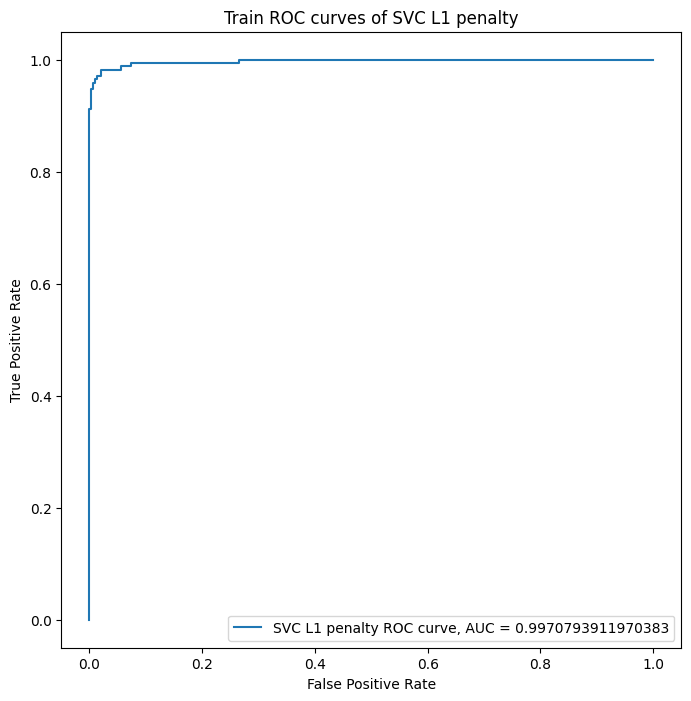

In [22]:
getSingleRunSummary(svc_models, "SVC L1 penalty", "Train", 29)

Test Details of the Final (29th) run: 
Test Confusion Matrix for SVC L1 penalty: 
[[67  4]
 [ 2 40]]


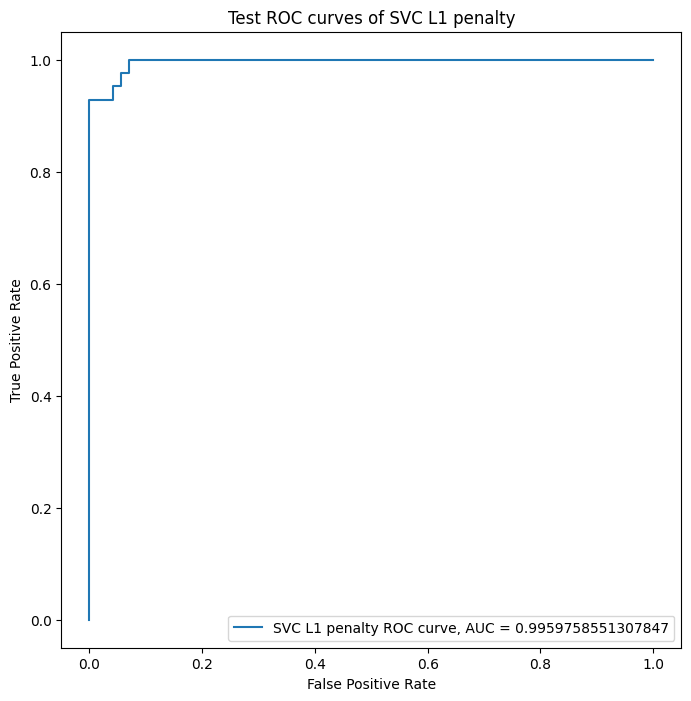

In [23]:
getSingleRunSummary(svc_models, "SVC L1 penalty", "Test", 29)

In [24]:
svc_avg_table = outputAverage(svc_models, results_columns, 'SVM L1 Penalty')
svc_avg_table

,SVM L1 Penalty Train,SVM L1 Penalty Test
Accuracy,0.984503,0.963127
Precision,0.987462,0.951641
Recall,0.970784,0.950000
F1 Score,0.979035,0.950332
AUC,0.981721,0.960446


In [25]:
model_results["SVC L1"] = svc_avg_table.T

#### (ii) Semi-Supervised Learning/ Self-training

In [26]:
def runSemiSVMModel(X, Y, grid_parameters):
    # Find indicies where class is 1 or 0
    indicies_class_1 = Y.index[Y == 1]
    indicies_class_0 = Y.index[Y == 0]
    # Randomly pick 50% of them to be unlabeled dataset
    unlabeled_data_1 = np.random.choice(indicies_class_1, round(len(indicies_class_1) * 0.5), replace=False)
    unlabeled_data_0 = np.random.choice(indicies_class_0, round(len(indicies_class_0) * 0.5), replace=False)
    # Get indicies of unlabeled data and labeled data
    unlabeled_data_indicies = np.concatenate([unlabeled_data_1, unlabeled_data_0])
    labeled_data_indices = list(set(Y.index) - set(unlabeled_data_indicies))
    # Create the Labeled Dataset
    labeled_data_x = X.loc[labeled_data_indices]
    labeled_data_y = Y[labeled_data_indices]
    # Create unlabeled dataset
    unlabeled_data_x = X.loc[unlabeled_data_indicies]
    unlabeled_data_y = Y[unlabeled_data_indicies]
    # Create model and fit
    estimator = LinearSVC(penalty='l1', dual=False, max_iter=150)
    grid = GridSearchCV(estimator=estimator, **grid_parameters)
    grid.fit(labeled_data_x, labeled_data_y)
    # Loop until all unlabeled data is labeled    
    while len(unlabeled_data_x) > 0:
        # Probabilities for each row
        prediction_probabilities = grid.decision_function(unlabeled_data_x)
        # For each feature
        weights_normalized = np.linalg.norm(grid.best_estimator_.coef_)
        distances = np.abs(prediction_probabilities/weights_normalized)
        # Get index of farthest distance
        farthest_distance_point = distances.argsort()[-1]
        # Get the data index of the farthest point since X and Y don't have their index reset
        farthest_point_index = unlabeled_data_x.index[farthest_distance_point]
        # Get the farthest points features and its label
        farthest_X = unlabeled_data_x[unlabeled_data_x.index == farthest_point_index]
        farthest_Y = unlabeled_data_y[unlabeled_data_y.index == farthest_point_index]
        # Add farthest point to labeled dataset
        labeled_data_x = pd.concat([labeled_data_x, farthest_X])
        labeled_data_y = pd.concat([labeled_data_y, farthest_Y])
        # Remove the farthest point from unlabeled dataset
        unlabeled_data_x.drop([farthest_X.index[0]], inplace=True, axis=0)
        unlabeled_data_y.drop([farthest_Y.index[0]], inplace=True, axis=0)
        # Rerun
        grid.best_estimator_.fit(labeled_data_x, labeled_data_y)
    return grid

In [27]:
def semiSupervisiedWrapper(data, runs):
    run_info = {}
    # Model definitions and Parameters
    cv = StratifiedKFold(5, shuffle=True, random_state=98)    
    model_parameters = {'C': np.logspace(-5, 5, 20)}
    grid_parameters = {
        'param_grid': model_parameters,
        'n_jobs': -1,
        'cv': cv
    }

    for i in range(runs):
        # Select Random
        train_x, train_y, test_x, test_y = splitData(data, i, 0.2)
        # Normalize
        norm = Normalizer()
        normalized_train_x = norm.fit_transform(train_x)  
        normalized_test_x = norm.fit_transform(test_x)
        normalized_train_x = pd.DataFrame(normalized_train_x, columns=train_x.columns, index=train_x.index)
        normalized_test_x = pd.DataFrame(normalized_test_x, columns=test_x.columns, index=test_x.index)
        # Make Grid Search     
        grid = runSemiSVMModel(normalized_train_x, train_y, grid_parameters)
        # Predictions
        training_prediction = grid.predict(normalized_train_x)
        testing_prediction = grid.predict(normalized_test_x)
        # Probabilities
        training_prediction_probabilities = grid.decision_function(normalized_train_x)
        testing_prediction_probabilities = grid.decision_function(normalized_test_x)
        # Gather information for each run
        information = {}
        information['Model'] = grid.best_estimator_
        information['Train'] = {"X": normalized_train_x, "Y": train_y, "Prediction": training_prediction,"Probability Prediction": training_prediction_probabilities}
        information['Test'] = {"X": normalized_test_x, "Y": test_y, "Prediction": testing_prediction, "Probability Prediction": testing_prediction_probabilities}
        print(i+1)
        run_info[i+1] = information
    return run_info

In [28]:
semi_supervisied_model = semiSupervisiedWrapper(dataframe, 30)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30


In [29]:
semi_supervisied_model = outputResults(semi_supervisied_model)

For Attempt: 1
Training Accuracy = 0.9780701754385965 & Testing Accuracy = 0.9557522123893806
For Attempt: 2
Training Accuracy = 0.9802631578947368 & Testing Accuracy = 0.9646017699115044
For Attempt: 3
Training Accuracy = 0.9780701754385965 & Testing Accuracy = 0.9734513274336283
For Attempt: 4
Training Accuracy = 0.9780701754385965 & Testing Accuracy = 0.9646017699115044
For Attempt: 5
Training Accuracy = 0.9758771929824561 & Testing Accuracy = 0.9646017699115044
For Attempt: 6
Training Accuracy = 0.9868421052631579 & Testing Accuracy = 0.9557522123893806
For Attempt: 7
Training Accuracy = 0.9802631578947368 & Testing Accuracy = 0.9646017699115044
For Attempt: 8
Training Accuracy = 0.9802631578947368 & Testing Accuracy = 0.9734513274336283
For Attempt: 9
Training Accuracy = 0.9692982456140351 & Testing Accuracy = 1.0
For Attempt: 10
Training Accuracy = 0.9890350877192983 & Testing Accuracy = 0.9469026548672567
For Attempt: 11
Training Accuracy = 0.9868421052631579 & Testing Accuracy 

Train Details of the Final (29th) run: 
Train Confusion Matrix for Semi Supervisied: 
[[284   2]
 [  7 163]]


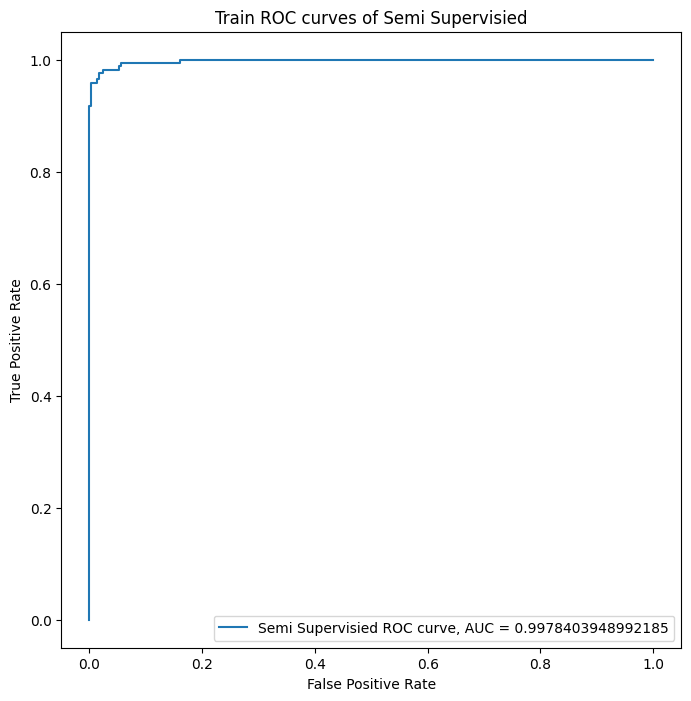

In [30]:
getSingleRunSummary(semi_supervisied_model, "Semi Supervisied", "Train", 29)

Test Details of the Final (29th) run: 
Test Confusion Matrix for Semi Supervisied: 
[[71  0]
 [ 2 40]]


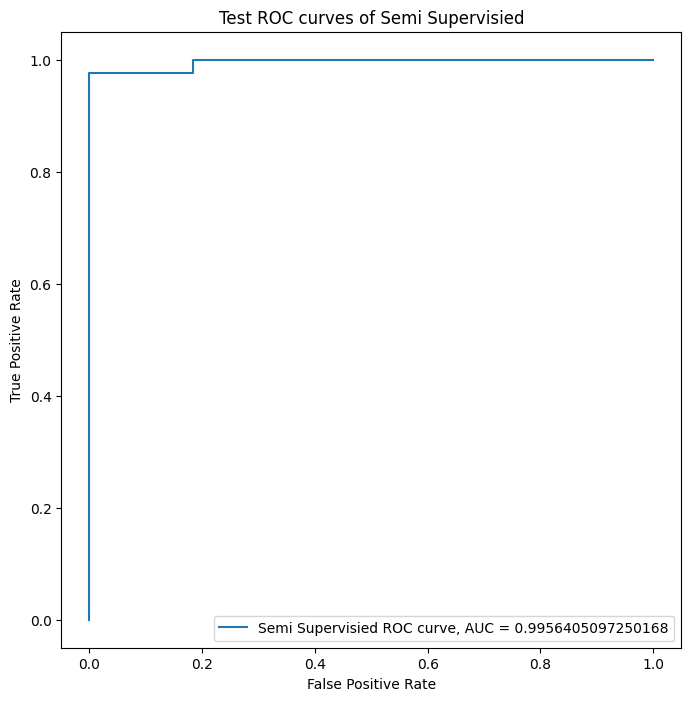

In [31]:
getSingleRunSummary(semi_supervisied_model, "Semi Supervisied", "Test", 29)

In [32]:
semi_supervisied_avg_table = outputAverage(semi_supervisied_model, results_columns, 'Semi-Supervisied Model')
semi_supervisied_avg_table

,Semi-Supervisied Model Train,Semi-Supervisied Model Test
Accuracy,0.976389,0.959587
Precision,0.984278,0.954738
Recall,0.951765,0.936508
F1 Score,0.967644,0.944991
AUC,0.971395,0.954874


In [33]:
model_results["Semi-Supervisied Model"] = semi_supervisied_avg_table.T

#### (iii) Unsupervised Learning

In [34]:
# Find distance of each point from both centers and probability of each point being in cluster 1 or 0
def findDistance(centers, X):
    distances = {}
    probabilities = {}
    # Get distances from each center
    for index in X.index:
        distances[index] = [np.linalg.norm(X.loc[index, :] - centers[0]), np.linalg.norm(X.loc[index, :] - centers[1])]
    probabilities = softmax(list(distances.values()), axis=1)
    distances = pd.DataFrame(distances, columns=X.index, index=[0 , 1]).T
    probabilities = pd.DataFrame(probabilities, columns=[0, 1], index=X.index)
    return distances, probabilities

# Label clusters based on majority label
def clusterLabel(distances, Y):
    majority_labeling= {}
    for label in [0,1]:
        current_distance = distances.loc[:,label]
        index_sort = np.array(current_distance).argsort()
        sorted_distances = current_distance.index[index_sort]
        thirthy_distances = sorted_distances[:30]
        label_counts = Y.loc[thirthy_distances].value_counts()
        majority_labeling[label] = label_counts.index[0]
    return majority_labeling

# Create majority labeling
def majorityLabeling(cluster_labels, predicted_labels):
    predictions = []
    for label in predicted_labels:
        predictions.append(cluster_labels[label])
    return predictions

In [35]:
def unsupervisiedWrapper(data, runs):
    run_info = {}
    for i in range(runs):
        train_x, train_y, test_x, test_y = splitData(data, i, 0.2)
        # Normalize
        norm = Normalizer()
        normalized_train_x = norm.fit_transform(train_x)
        normalized_test_x = norm.fit_transform(test_x)
        normalized_train_x = pd.DataFrame(normalized_train_x, columns=train_x.columns, index=train_x.index)
        normalized_test_x = pd.DataFrame(normalized_test_x, columns=test_x.columns, index=test_x.index)
        # Create Model
        kmeans_model = KMeans(n_clusters=2, n_init=15, random_state=i).fit(normalized_train_x)
        cluster_centers = kmeans_model.cluster_centers_
        # Get Point Distances
        train_cluster_distances, train_probabilities = findDistance(cluster_centers, normalized_train_x)
        test_cluster_distances, test_probabilities = findDistance(cluster_centers, normalized_test_x)
        # Predictions
        training_prediction = kmeans_model.predict(normalized_train_x)
        testing_prediction = kmeans_model.predict(normalized_test_x)
        # Majority Labeling
        train_cluster_labels = clusterLabel(train_cluster_distances, train_y)
        test_cluster_labels= clusterLabel(test_cluster_distances, test_y)
        # Getting majority label prediction
        train_majority_label = majorityLabeling(train_cluster_labels, training_prediction)
        test_majority_label = majorityLabeling(test_cluster_labels, testing_prediction)
        # Gather information for each run
        # TAKE positive as class 1
        information = {}
        information['Model'] = kmeans_model
        information['Train'] = {"X": normalized_train_x, "Y": train_y, "Prediction": train_majority_label,"Probability Prediction": train_probabilities.iloc[:, 1]}
        information['Test'] = {"X": normalized_test_x, "Y": test_y, "Prediction": test_majority_label, "Probability Prediction": test_probabilities.iloc[:, 1]}
        print(i+1)
        run_info[i+1] = information
    return run_info

In [36]:
unsupervisied_models = unsupervisiedWrapper(dataframe, 30)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30


In [37]:
unsupervisied_models = outputResults(unsupervisied_models)

For Attempt: 1
Training Accuracy = 0.8903508771929824 & Testing Accuracy = 0.8495575221238938
For Attempt: 2
Training Accuracy = 0.8991228070175439 & Testing Accuracy = 0.9026548672566371
For Attempt: 3
Training Accuracy = 0.881578947368421 & Testing Accuracy = 0.911504424778761
For Attempt: 4
Training Accuracy = 0.8903508771929824 & Testing Accuracy = 0.8495575221238938
For Attempt: 5
Training Accuracy = 0.8903508771929824 & Testing Accuracy = 0.8849557522123894
For Attempt: 6
Training Accuracy = 0.8859649122807017 & Testing Accuracy = 0.9026548672566371
For Attempt: 7
Training Accuracy = 0.8925438596491229 & Testing Accuracy = 0.8761061946902655
For Attempt: 8
Training Accuracy = 0.8881578947368421 & Testing Accuracy = 0.8938053097345132
For Attempt: 9
Training Accuracy = 0.8859649122807017 & Testing Accuracy = 0.9026548672566371
For Attempt: 10
Training Accuracy = 0.8969298245614035 & Testing Accuracy = 0.8495575221238938
For Attempt: 11
Training Accuracy = 0.8903508771929824 & Test

Train Details of the Final (29th) run: 
Train Confusion Matrix for KMeans Model: 
[[280   6]
 [ 46 124]]


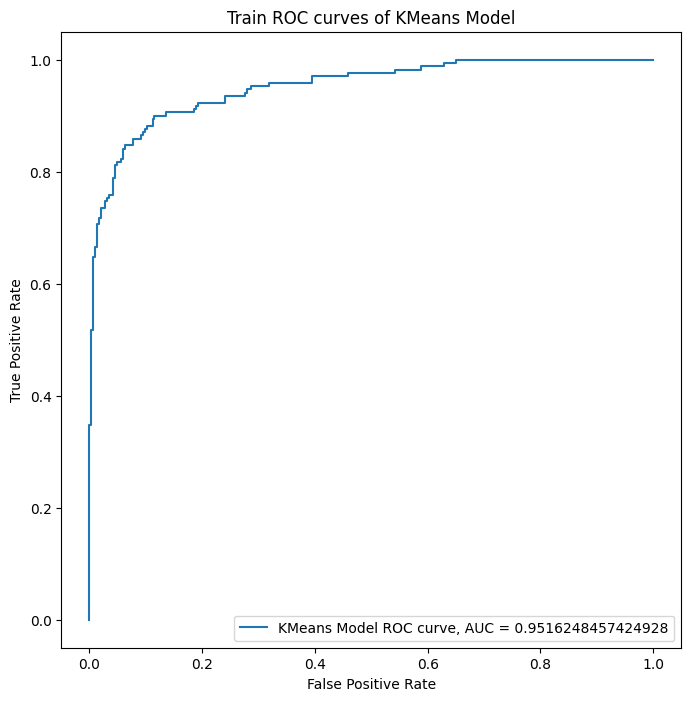

In [38]:
getSingleRunSummary(unsupervisied_models, "KMeans Model", "Train", 29)

Test Details of the Final (29th) run: 
Test Confusion Matrix for KMeans Model: 
[[70  1]
 [ 9 33]]


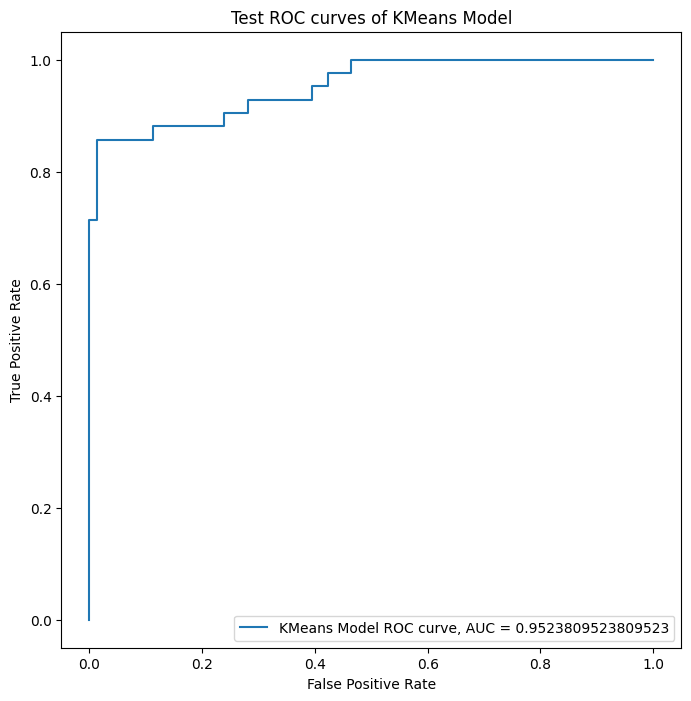

In [39]:
getSingleRunSummary(unsupervisied_models, "KMeans Model", "Test", 29)

In [40]:
kmeans_table = outputAverage(unsupervisied_models, results_columns, 'KMeans Model')
kmeans_table

,KMeans Model Train,KMeans Model Test
Accuracy,0.886257,0.891150
Precision,0.958098,0.964337
Recall,0.726863,0.734921
F1 Score,0.826382,0.831914
AUC,0.853933,0.859244


In [41]:
model_results["KMeans Model"] = kmeans_table.T

To make sure that the algorithm is not trapped in a local minimum we can set the value of the hyperparameter 'n_init' (number of interations).

#### (iv) Spectral Clustering

In [42]:
def plotROC(data, graph_titles, data_Type, run_number):
    results = data[run_number][data_Type]
    tpr, fpr = results["TPR"], results["FPR"]
    fig, axes = plt.subplots(figsize=(8,8))
    axes.plot(fpr, tpr, label="{} ROC Curve for Run number {}".format(data_Type, run_number))
    axes.set_xlabel("False Positive Rate")
    axes.set_ylabel("True Positive Rate")
    axes.set_title("ROC curve for {}".format(graph_titles))
    axes.legend(loc='best')
    plt.show()

In [43]:
def cvForGamma(number_class1, number_class0, X, randomState):
    gammas = np.logspace(0, 10, 40)
    class_percentage = []
    for gamma in gammas:
        model = SpectralClustering(n_clusters=2, affinity='rbf', gamma=gamma, assign_labels='kmeans', random_state=randomState, n_jobs=-1)
        predicted_labels = model.fit_predict(X)
        # Find predictions that are 1 and 0
        predicted_class1 = len(predicted_labels[predicted_labels == 1])
        predicted_class0 = len(predicted_labels[predicted_labels == 0])
        # Find the percentage of predictions this gamma value got correct
        percentage_class1 = (number_class1 - predicted_class1)/(number_class1 + predicted_class1)
        percentage_class0 = (number_class0 - predicted_class0)/(number_class0 + predicted_class0)
        class_percentage.append(np.abs(percentage_class1) + np.abs(percentage_class0))
    best_gamma = gammas[np.argmin(class_percentage)] # Pick gamma with the lowest difference percentage
    return best_gamma

def getInformationROC(true, predictions):
    # Loop through different thresholds to do FPR and TPR plots
    tprs, fprs, thresholds = [], [], np.arange(0, 1.01, 0.01)
    class1 = np.where(predictions == 1)
    class0 = np.where(predictions == 0)
    majority_label_prediction = np.array([2 for i in range(len(predictions))])
    num_1 = len(class1[0])
    num_0 = len(class0[0])
    # Number of points where true label is 1
    number_index_1 = len(class1[0][true.iloc[class1[0]] == 1])
    number_index_0 = len(class0[0][true.iloc[class0[0]] == 1])
    for threshold in thresholds:
        # Set the majority
        majority_label_cluster1 = 1 if ((number_index_1+1)/(num_1+1)) >= threshold else 0
        majority_label_cluster0 = 1 if ((number_index_0+1)/(num_0+1)) >= threshold else 0
        # Create prediction with majority label
        majority_label_prediction[class1[0]] = majority_label_cluster1
        majority_label_prediction[class0[0]] = majority_label_cluster0
        # Get TPR and FPR using confusion matrix
        matrix = confusion_matrix(true, majority_label_prediction)
        tn, fp, fn, tp = matrix.ravel()
        # Calculate TPR and FPR
        tpr = tp/(tp+fn)
        fpr = fp/(fp+tn)
        # Add TPR and FPR to list
        tprs.append(tpr)
        fprs.append(fpr)
    return tprs, fprs

In [44]:
def spectralClusteringWrapper(data, runs):
    run_info = {}

    for i in range(runs):
        # Select Random
        train_x, train_y, test_x, test_y = splitData(data, i, 0.2)
        # Normalize
        norm = Normalizer()
        normalized_train_x = norm.fit_transform(train_x)  
        normalized_test_x = norm.fit_transform(test_x)
        normalized_train_x = pd.DataFrame(normalized_train_x, columns=train_x.columns, index=train_x.index)
        normalized_test_x = pd.DataFrame(normalized_test_x, columns=test_x.columns, index=test_x.index)
        # Calculate number of classes in train
        number_labels1 = len(train_y[train_y == 1])
        number_labels0 = len(train_y[train_y == 0])
        # Find the gamma value
        gamma = cvForGamma(number_labels1, number_labels0, normalized_train_x,i)
        # Make Grid Search     
        model = SpectralClustering(n_clusters=2, n_init=20, affinity='rbf', gamma=gamma, assign_labels='kmeans', random_state=i, n_jobs=-1)
        # Spectral Prediction
        training_labels = model.fit_predict(normalized_train_x)
        # Train and Test Prediction using KNN
        model_knn = KNeighborsClassifier(1, n_jobs=-1)
        model_knn.fit(normalized_train_x, training_labels)
        training_prediction = model_knn.predict(normalized_train_x)
        testing_prediction = model_knn.predict(normalized_test_x)
        # Find TPR and FPR for Train and Test predictions
        training_tpr, training_fpr = getInformationROC(train_y, training_prediction)
        testing_tpr, testing_fpr = getInformationROC(test_y, testing_prediction)
        # Gather information for each run
        information = {}
        information['Model'] = {"KNN": model_knn,"Spectral": model}
        information['Train'] = {"X": normalized_train_x, "Y": train_y, "Prediction": training_prediction,"TPR":training_tpr, "FPR": training_fpr}
        information['Test'] = {"X": normalized_test_x, "Y": test_y, "Prediction": testing_prediction, "TPR": testing_tpr, "FPR": testing_fpr}
        print(i+1)
        run_info[i+1] = information
    return run_info

In [45]:
spectral_cluster_models = spectralClusteringWrapper(dataframe, 30)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30


In [46]:
spectral_cluster_models = outputResults(spectral_cluster_models)

For Attempt: 1
Training Accuracy = 0.8903508771929824 & Testing Accuracy = 0.8584070796460177
For Attempt: 2
Training Accuracy = 0.8881578947368421 & Testing Accuracy = 0.9026548672566371
For Attempt: 3
Training Accuracy = 0.8771929824561403 & Testing Accuracy = 0.8761061946902655
For Attempt: 4
Training Accuracy = 0.8859649122807017 & Testing Accuracy = 0.8230088495575221
For Attempt: 5
Training Accuracy = 0.39473684210526316 & Testing Accuracy = 0.37168141592920356
For Attempt: 6
Training Accuracy = 0.8837719298245614 & Testing Accuracy = 0.8672566371681416
For Attempt: 7
Training Accuracy = 0.8881578947368421 & Testing Accuracy = 0.8584070796460177
For Attempt: 8
Training Accuracy = 0.5986842105263158 & Testing Accuracy = 0.6017699115044248
For Attempt: 9
Training Accuracy = 0.875 & Testing Accuracy = 0.8938053097345132
For Attempt: 10
Training Accuracy = 0.8881578947368421 & Testing Accuracy = 0.8230088495575221
For Attempt: 11
Training Accuracy = 0.43859649122807015 & Testing Accu

Train Details of the Final (29th) run: 
Train Confusion Matrix for Spectral Clustering Model: 
[[280   6]
 [ 48 122]]


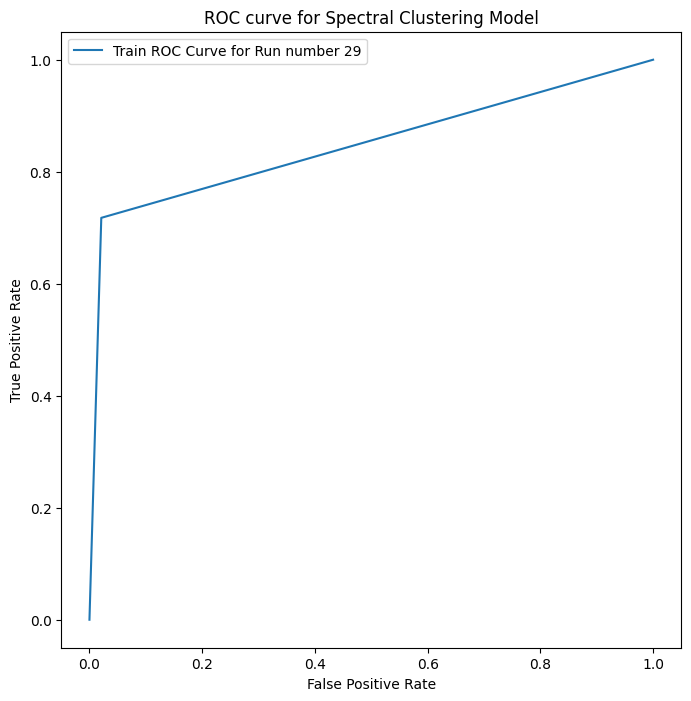

In [47]:
print("{} Details of the Final ({}th) run: ".format("Train", 29))
spectral_train_conf = confusion_matrix(spectral_cluster_models[29]["Train"]['Y'], spectral_cluster_models[29]["Train"]['Prediction'])
print('{} Confusion Matrix for {}: \n{}'.format("Train", "Spectral Clustering Model", spectral_train_conf))
plotROC(spectral_cluster_models,"Spectral Clustering Model", "Train", 29)

Test Details of the Final (29th) run: 
Test Confusion Matrix for Spectral Clustering Model: 
[[70  1]
 [10 32]]


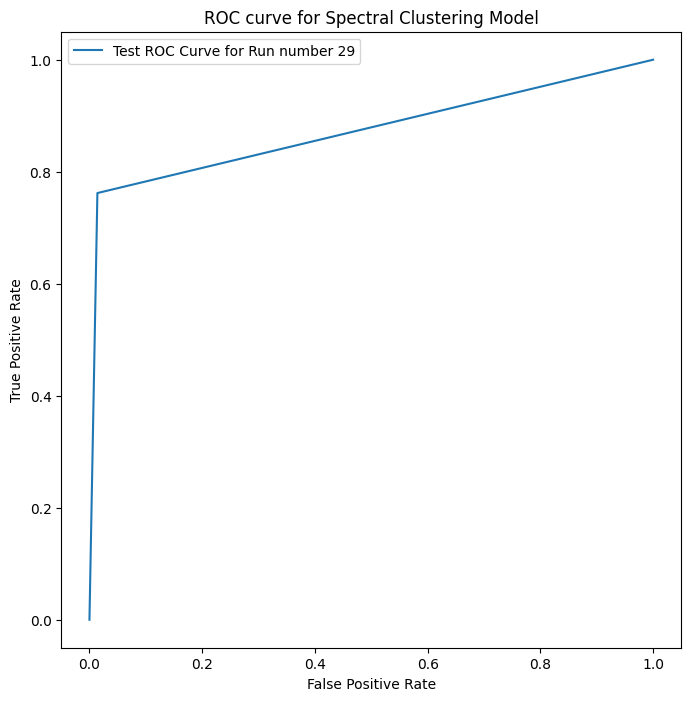

In [48]:
print("{} Details of the Final ({}th) run: ".format("Test", 29))
spectral_test_conf = confusion_matrix(spectral_cluster_models[29]["Test"]['Y'], spectral_cluster_models[29]["Test"]['Prediction'])
print('{} Confusion Matrix for {}: \n{}'.format("Test", "Spectral Clustering Model", spectral_test_conf))
plotROC(spectral_cluster_models,"Spectral Clustering Model", "Test", 29)

In [49]:
spectral_table = outputAverage(spectral_cluster_models, results_columns, 'Spectral Clustering Model')
spectral_table

,Spectral Clustering Model Train,Spectral Clustering Model Test
Accuracy,0.780190,0.775221
Precision,0.811574,0.856017
Recall,0.583529,0.571429
F1 Score,0.643705,0.638596
AUC,0.740308,0.733602


In [50]:
model_results["Spectral Clustering Model"] = spectral_table.T

#### (iv) Compare

In [51]:
pd.concat(list(model_results.values()))

,Accuracy,Precision,Recall,F1 Score,AUC
SVM L1 Penalty Train,0.984503,0.987462,0.970784,0.979035,0.981721
SVM L1 Penalty Test,0.963127,0.951641,0.950000,0.950332,0.960446
Semi-Supervisied Model Train,0.976389,0.984278,0.951765,0.967644,0.971395
Semi-Supervisied Model Test,0.959587,0.954738,0.936508,0.944991,0.954874
KMeans Model Train,0.886257,0.958098,0.726863,0.826382,0.853933
KMeans Model Test,0.891150,0.964337,0.734921,0.831914,0.859244
Spectral Clustering Model Train,0.780190,0.811574,0.583529,0.643705,0.740308
Spectral Clustering Model Test,0.775221,0.856017,0.571429,0.638596,0.733602


Based on the average accuracy results we can see that Supervisied Learning results in the highest accuracy (98%) followed by Semi-Supervisied, and finally Unsuperivised. 

## 2. Active Learning Using Support Vector Machines

### (a) Download the banknote authentication Data Set

In [11]:
column_names = ['variance of Wavelet Transformed image','skewness of Wavelet Transformed image','curtosis of Wavelet Transformed image','entropy of image','class']
dataframe2 = pd.read_csv('../data/data_banknote_authentication.csv', names=column_names)

In [12]:
index_indicies = np.random.choice(dataframe2.shape[0], 472, replace=False)
test_index = dataframe2.index[index_indicies]
train_index = list(set(dataframe2.index)-set(test_index))
# Get train and test sets
SVM_train_X, SVM_train_Y = dataframe2.iloc[train_index, :-1], dataframe2.iloc[train_index, -1]
SVM_test_X, SVM_test_Y = dataframe2.iloc[test_index, :-1], dataframe2.iloc[test_index, -1]

In [13]:
print(SVM_train_X.shape[0])
print(SVM_test_X.shape[0])

900
472


### (b) Repeat each of the following two procedures 50 times

#### (i) Passive

In [15]:
def passive_learning_SVM(X, Y, test_X, test_Y):
    cv = StratifiedKFold(5, shuffle=True, random_state=98)    
    model_parameters = {'C': np.logspace(1, 5, 20)}
    grid_parameters = {
        'param_grid': model_parameters,
        'n_jobs': -1,
        'cv': cv
    }    
    error_rate = []
    index_used = []
    list_indicies_left = list(Y.index)
    random_indicies_added = []
    for run in range(90):
        # Pick data
        np.random.shuffle(list_indicies_left)
        random_indicies_added = list_indicies_left[:10]
        while (len(Y.loc[random_indicies_added].value_counts().index) != 2):
            np.random.shuffle(list_indicies_left)
            random_indicies_added = list_indicies_left[:10]
        index_used.extend(random_indicies_added)
        list_indicies_left = list_indicies_left[10:]
        current_X_Use = X.loc[index_used]
        current_Y_Use = Y.loc[index_used]
        # Define model and predict
        grid = GridSearchCV(LinearSVC(penalty='l1', dual=False, max_iter=200), **grid_parameters)
        grid.fit(current_X_Use, current_Y_Use)
        current_prediction = grid.predict(test_X)
        # Evaluate model
        run_acc = accuracy_score(test_Y, current_prediction)
        error_rate.append(1-run_acc)
    return error_rate

In [16]:
passive_learner = {}
for i in range(50):
    passive_learner[i+1] = passive_learning_SVM(SVM_train_X, SVM_train_Y, SVM_test_X, SVM_test_Y)

In [17]:
averages_passive = np.mean(list(passive_learner.values()), axis=0)

In [18]:
averages_passive

array([0.09627119, 0.06292373, 0.03745763, 0.0279661 , 0.02351695,
       0.02148305, 0.01940678, 0.01754237, 0.01622881, 0.01516949,
       0.0140678 , 0.0140678 , 0.01288136, 0.01271186, 0.01216102,
       0.01220339, 0.01237288, 0.0120339 , 0.01152542, 0.0109322 ,
       0.01059322, 0.01050847, 0.01050847, 0.01029661, 0.01004237,
       0.01004237, 0.01012712, 0.00995763, 0.01016949, 0.01      ,
       0.01      , 0.01004237, 0.01004237, 0.00995763, 0.01008475,
       0.00987288, 0.00987288, 0.00974576, 0.00987288, 0.01      ,
       0.00970339, 0.00991525, 0.00995763, 0.00995763, 0.01      ,
       0.00995763, 0.01004237, 0.01004237, 0.01008475, 0.01012712,
       0.00995763, 0.01008475, 0.00991525, 0.00991525, 0.00983051,
       0.00978814, 0.00995763, 0.01      , 0.01016949, 0.01008475,
       0.01008475, 0.01012712, 0.00987288, 0.00983051, 0.00995763,
       0.01012712, 0.01016949, 0.00991525, 0.01012712, 0.01033898,
       0.01025424, 0.01038136, 0.01029661, 0.01029661, 0.01012

#### (ii) Active

In [19]:
def activeSVM(X, Y, test_X, test_Y):
    cv = StratifiedKFold(5, shuffle=True, random_state=98)    
    model_parameters = {'C': np.logspace(1, 5, 20)}
    grid_parameters = {
        'param_grid': model_parameters,
        'n_jobs': -1,
        'cv': cv
    }      
    error_rate = []
    index_used = list(X.index)
    np.random.shuffle(index_used)
    while (len(Y.loc[index_used[:10]].value_counts().index) != 2):
        np.random.shuffle(index_used)
    index_used = index_used[:10]
    for run in range(90):
        data_X = X.loc[index_used]
        data_Y = Y.loc[index_used]
        estimator = LinearSVC(penalty='l1', dual=False, max_iter=200)
        grid = GridSearchCV(estimator, **grid_parameters)
        grid.fit(data_X, data_Y)
        prediction = grid.predict(test_X)
        acc = accuracy_score(test_Y, prediction)
        error_rate.append(1-acc)
        # Avoid trying to find closet points after every point has been dropped
        if(X.drop(index_used).shape[0]==0):
            break
        # Get thte distances of each point
        point_distance = grid.decision_function(X.drop(index_used))
        # sort the distances 
        sorted_indices = np.argsort(np.abs(point_distance))
        # Pick the top 10
        closest_ten = X.drop(index_used).index[sorted_indices][:10]
        index_used.extend(closest_ten)
    return error_rate

In [20]:
active_learner = {}
for i in range(50):
    active_learner[i+1] = activeSVM(SVM_train_X, SVM_train_Y, SVM_test_X, SVM_test_Y)

In [21]:
averages_active = np.mean(list(active_learner.values()), axis=0)

In [22]:
averages_active

array([0.11936441, 0.05220339, 0.03915254, 0.02436441, 0.01364407,
       0.01076271, 0.01110169, 0.01067797, 0.01038136, 0.01050847,
       0.01059322, 0.01059322, 0.01059322, 0.01059322, 0.01059322,
       0.01059322, 0.01059322, 0.01059322, 0.01059322, 0.01059322,
       0.01059322, 0.01059322, 0.01059322, 0.01059322, 0.01059322,
       0.01059322, 0.01059322, 0.01059322, 0.01059322, 0.01059322,
       0.01059322, 0.01059322, 0.01059322, 0.01059322, 0.01059322,
       0.01059322, 0.01059322, 0.01059322, 0.01059322, 0.01059322,
       0.01059322, 0.01059322, 0.01059322, 0.01059322, 0.01059322,
       0.01059322, 0.01059322, 0.01059322, 0.01059322, 0.01059322,
       0.01059322, 0.01059322, 0.01059322, 0.01059322, 0.01059322,
       0.01059322, 0.01059322, 0.01059322, 0.01059322, 0.01059322,
       0.01059322, 0.01059322, 0.01059322, 0.01059322, 0.01059322,
       0.01059322, 0.01059322, 0.01059322, 0.01059322, 0.01059322,
       0.01059322, 0.01059322, 0.01059322, 0.01059322, 0.01059

### (c) Average the 50 test errors

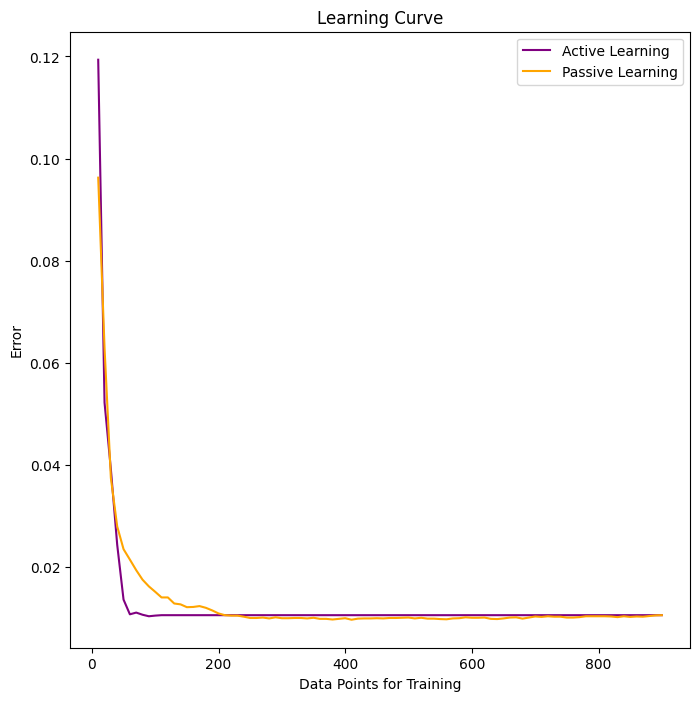

In [23]:
fig, axes = plt.subplots(figsize=(8,8))
axes.plot([i for i in range(10, 910, 10)], averages_active, label='Active Learning', color='purple')
axes.plot([i for i in range(10, 910, 10)], averages_passive, label='Passive Learning', color='orange')
axes.set_xlabel("Data Points for Training")
axes.set_ylabel("Error")
axes.legend(loc='best')
axes.set_title('Learning Curve')
plt.show()

# References:
https://stackoverflow.com/questions/50849789/what-does-the-numpy-linalg-norm-function

https://stats.stackexchange.com/questions/167682/getting-distance-of-points-from-decision-boundary-with-linear-svm

https://stackoverflow.com/questions/32074239/sklearn-getting-distance-of-each-point-from-decision-boundary